Calculate various properties of mutations at generation 10k for mutations that did fix and those that did not.

* frequency
* effect size
* $V(A)_i = 2pqe^2$

In [1]:
%matplotlib inline
import feather
import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
fixations1=pd.read_hdf('../H2_0.2_OPT_0.5_mu_0.001.fixations.h5')
fixations2=pd.read_hdf('../H2_0.2_OPT_1_mu_0.001.fixations.h5')
fixations1.reset_index(inplace=True,drop=True)
fixations2.reset_index(inplace=True,drop=True)

In [3]:
#Trim fixations down to the generation of the optimum shift
fixations1=fixations1[fixations1.generation==10000]
fixations2=fixations2[fixations2.generation==10000]

In [4]:
losses1=pd.read_hdf('../H2_0.2_OPT_0.5_mu_0.001.losses.h5')
losses2=pd.read_hdf('../H2_0.2_OPT_1_mu_0.001.losses.h5')
losses1.reset_index(inplace=True,drop=True)
losses2.reset_index(inplace=True,drop=True)

In [5]:
losses1=losses1[losses1.generation==10000]
losses2=losses2[losses2.generation==10000]

Add $2pqe^2$ and $\Delta q \propto pqe$ to each DataFrame:

In [6]:
VA = fixations1.freq.multiply(2.0)
fixations1['VA']=VA.multiply(fixations1.freq.multiply(-1).add(1.0).multiply(fixations1.esize).multiply(fixations1.esize))
fixations1['dq']=fixations1.VA.divide(fixations1.esize).divide(2.0)

In [7]:
VA = fixations2.freq.multiply(2.0)
fixations2['VA']=VA.multiply(fixations2.freq.multiply(-1).add(1.0).multiply(fixations2.esize).multiply(fixations2.esize))
fixations2['dq']=fixations2.VA.divide(fixations2.esize).divide(2.0)

In [8]:
VA = losses1.freq.multiply(2.0)
losses1['VA']=VA.multiply(losses1.freq.multiply(-1).add(1.0).multiply(losses1.esize).multiply(losses1.esize))
losses1['dq']=losses1.VA.divide(losses1.esize).divide(2.0)

In [11]:
VA = losses2.freq.multiply(2.0)
losses2['VA']=VA.multiply(losses2.freq.multiply(-1).add(1.0).multiply(losses2.esize).multiply(losses2.esize))
losses2['dq']=losses2.VA.divide(losses2.esize).divide(2.0)

In [12]:
losses2.head()

,esize,freq,generation,origin,pos,rep,age,VA,dq
11360,0.020283,0.0760,10000,9648,0.744575,0,353.0,0.000058,0.001424
13411,-0.043503,0.0140,10000,9775,0.840054,0,226.0,0.000052,-0.000601
14164,0.157518,0.0025,10000,9807,0.110068,0,194.0,0.000124,0.000393
14791,-0.057033,0.0170,10000,9845,0.589593,0,156.0,0.000109,-0.000953
16113,0.130926,0.0055,10000,9947,0.691375,0,54.0,0.000188,0.000716


Quick-n-dirty VG for each replicate:

In [13]:
VG1=fixations1.groupby('rep').sum().VA+losses1.groupby('rep').sum().VA
VGt=pd.DataFrame({'VGt':VG1})
VGt.reset_index(inplace=True)

In [14]:
fixations1=pd.merge(fixations1,VGt,on='rep')
losses1=pd.merge(losses1,VGt,on='rep')

In [15]:
VG2=fixations2.groupby('rep').sum().VA+losses2.groupby('rep').sum().VA
VGt=pd.DataFrame({'VGt':VG2})
VGt.reset_index(inplace=True)

In [16]:
fixations2=pd.merge(fixations2,VGt,on='rep')
losses2=pd.merge(losses2,VGt,on='rep')

In [17]:
fixations1['pVG']=fixations1.VA/fixations1.VGt

In [18]:
fixations2['pVG']=fixations2.VA/fixations2.VGt
losses1['pVG']=losses1.VA/losses1.VGt
losses2['pVG']=losses2.VA/losses2.VGt

Now, we should be ready to plot:

In [19]:
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams.update({'legend.fontsize': 14})

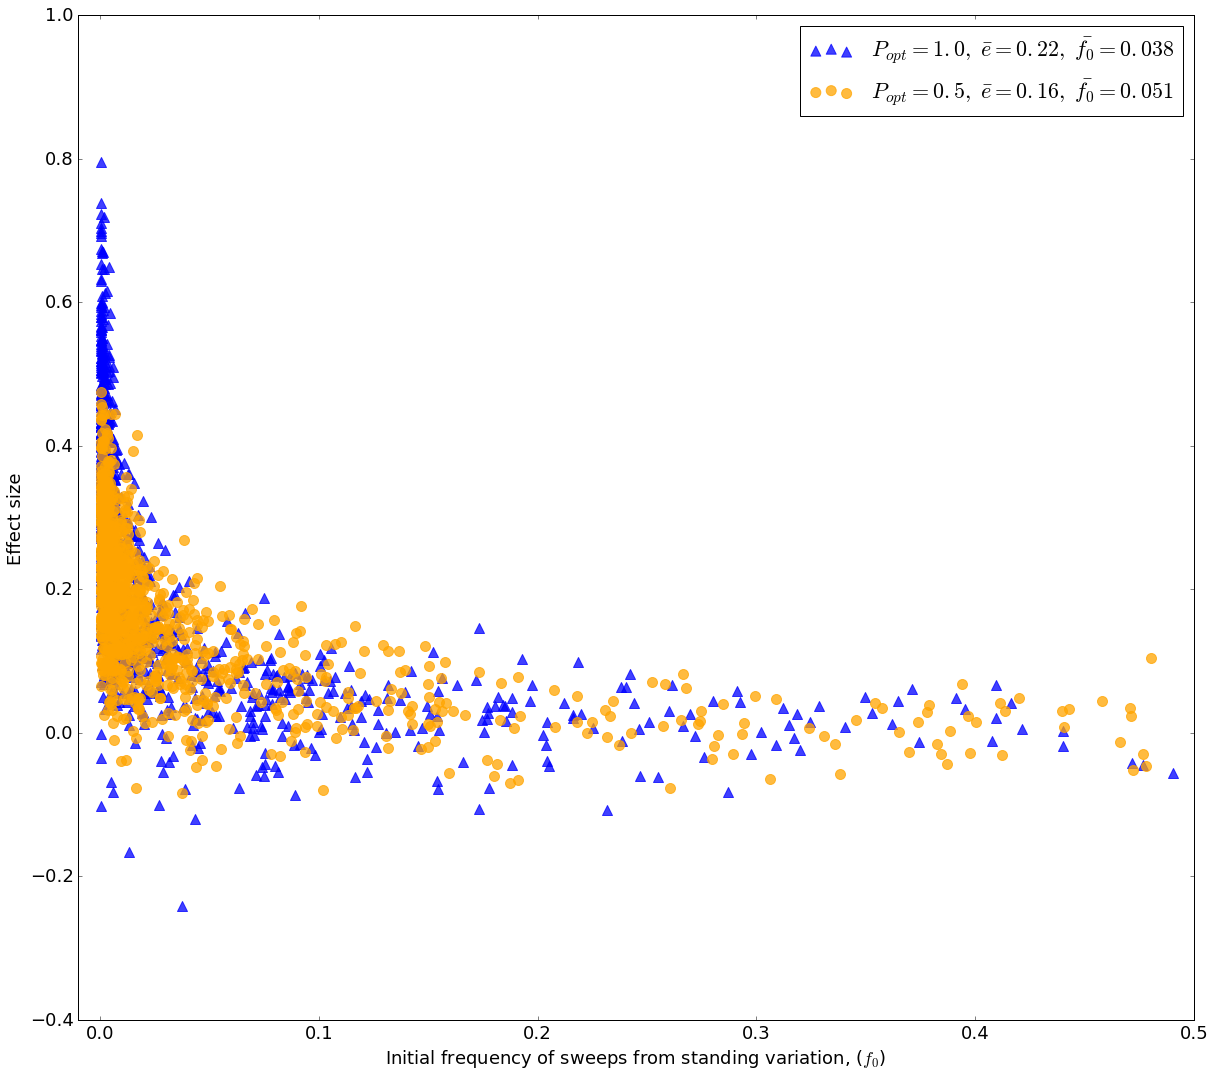

In [20]:
fig=matplotlib.pyplot.gcf()
fig.set_size_inches(20, 18)
plt.scatter(fixations2.freq,fixations2.esize,color='blue',alpha=0.75,label=r'$P_{opt} = 1.0,\ \bar{e}=0.22,\ \bar{f_0}=0.038$',s=100,marker="^")
plt.scatter(fixations1.freq,fixations1.esize,color='orange',alpha=0.75,label=r'$P_{opt} = 0.5,\ \bar{e}=0.16,\ \bar{f_0}=0.051$',s=100)

plt.xlim(-0.01,0.5)
plt.xlabel("Initial frequency of sweeps from standing variation, "+r'($f_0$)')
plt.ylabel("Effect size")
plt.legend(fontsize=22)
plt.savefig("StandingSweepFreq.pdf")

In [21]:
print(fixations1.mean())
print(fixations2.mean())

esize             0.161412
freq              0.051481
generation    10000.000000
origin         9849.444757
pos               0.503111
rep             514.598315
age             151.555243
VA                0.000683
dq                0.002107
VGt               0.004288
pVG               0.162333
dtype: float64
esize             0.226193
freq              0.038318
generation    10000.000000
origin         9874.445127
pos               0.496423
rep             503.933998
age             126.554873
VA                0.000617
dq                0.001525
VGt               0.004297
pVG               0.150300
dtype: float64


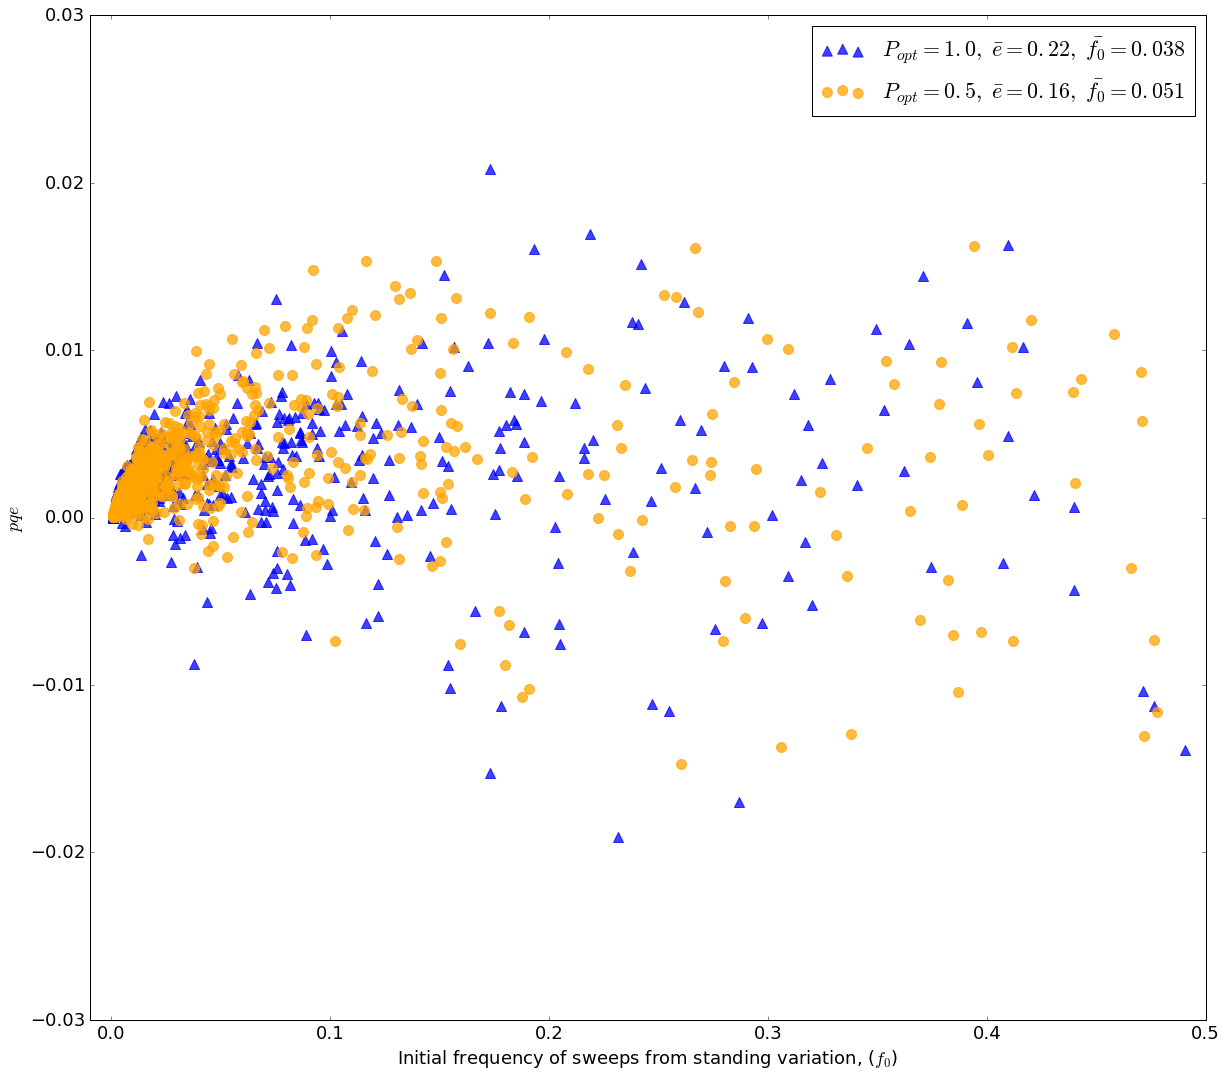

In [22]:
fig=matplotlib.pyplot.gcf()
fig.set_size_inches(20, 18)
plt.scatter(fixations2.freq,fixations2.dq,color='blue',alpha=0.75,label=r'$P_{opt} = 1.0,\ \bar{e}=0.22,\ \bar{f_0}=0.038$',s=100,marker="^")
plt.scatter(fixations1.freq,fixations1.dq,color='orange',alpha=0.75,label=r'$P_{opt} = 0.5,\ \bar{e}=0.16,\ \bar{f_0}=0.051$',s=100)

plt.xlim(-0.01,0.5)
plt.xlabel("Initial frequency of sweeps from standing variation, "+r'($f_0$)')
plt.ylabel(r'$pqe$')
plt.legend(fontsize=22)
#plt.savefig("StandingSweepFreq.pdf")

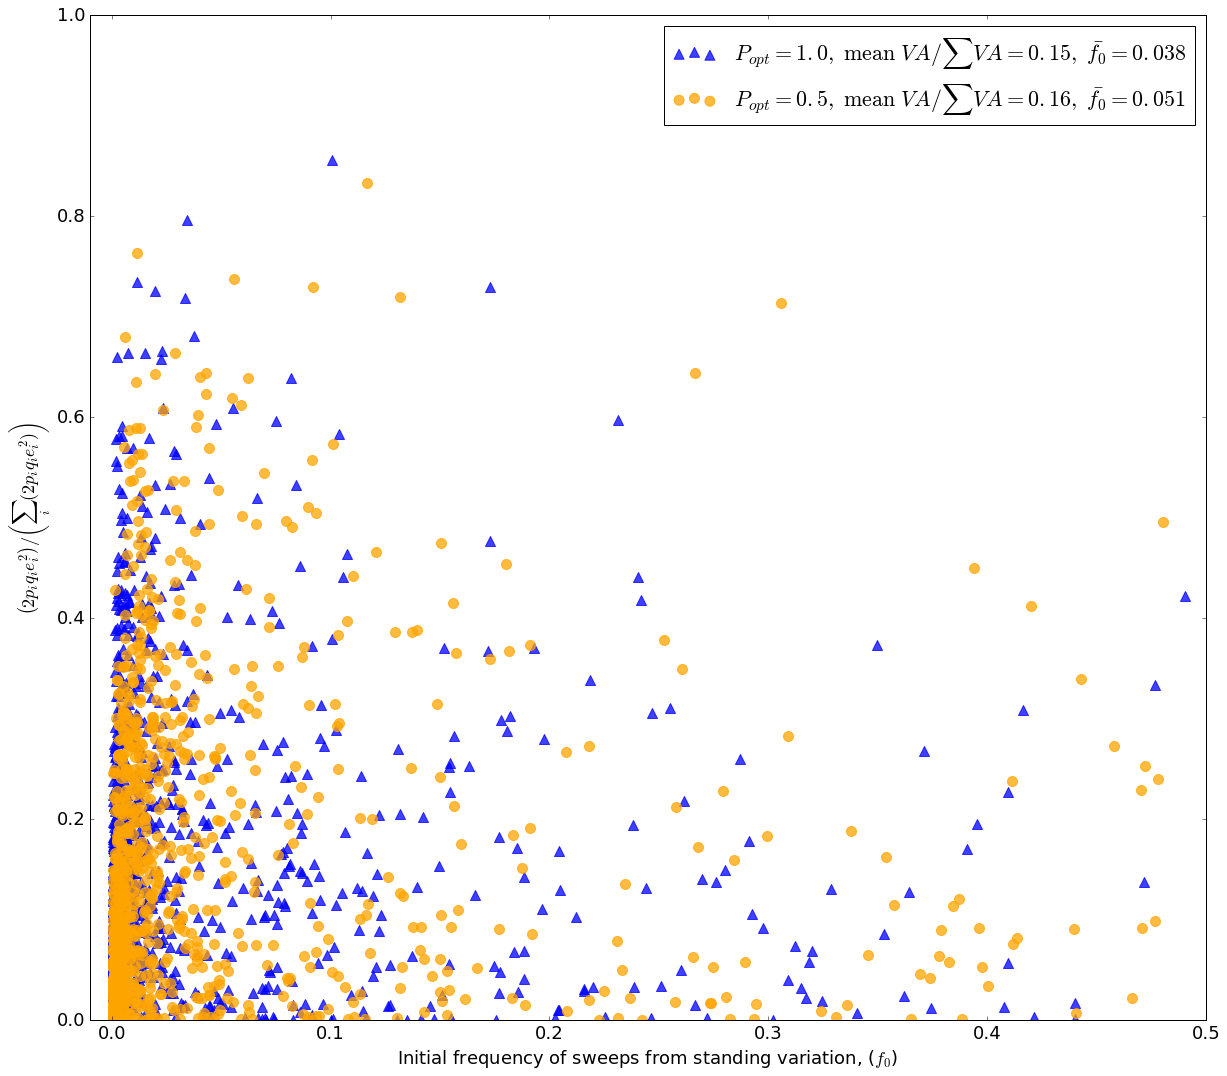

In [23]:
fig=matplotlib.pyplot.gcf()
fig.set_size_inches(20, 18)
plt.scatter(fixations2.freq,fixations2.pVG,color='blue',alpha=0.75,label=r'$P_{opt} = 1.0,\ \mathrm{mean\ }VA/\sum VA = 0.15,\ \bar{f_0}=0.038$',s=100,marker="^")
plt.scatter(fixations1.freq,fixations1.pVG,color='orange',alpha=0.75,label=r'$P_{opt} = 0.5,\ \mathrm{mean\ }VA/\sum VA = 0.16,\ \bar{f_0}=0.051$',s=100)

plt.xlim(-0.01,0.5)
plt.ylim(0,1)
plt.xlabel("Initial frequency of sweeps from standing variation, "+r'($f_0$)')
plt.ylabel(r'$\left(2p_iq_ie_i^2\right)/\left(\sum_i(2p_iq_ie_i^2)\right)$')
plt.legend(fontsize=22)
plt.savefig("FixationsScaledEsizes.pdf")

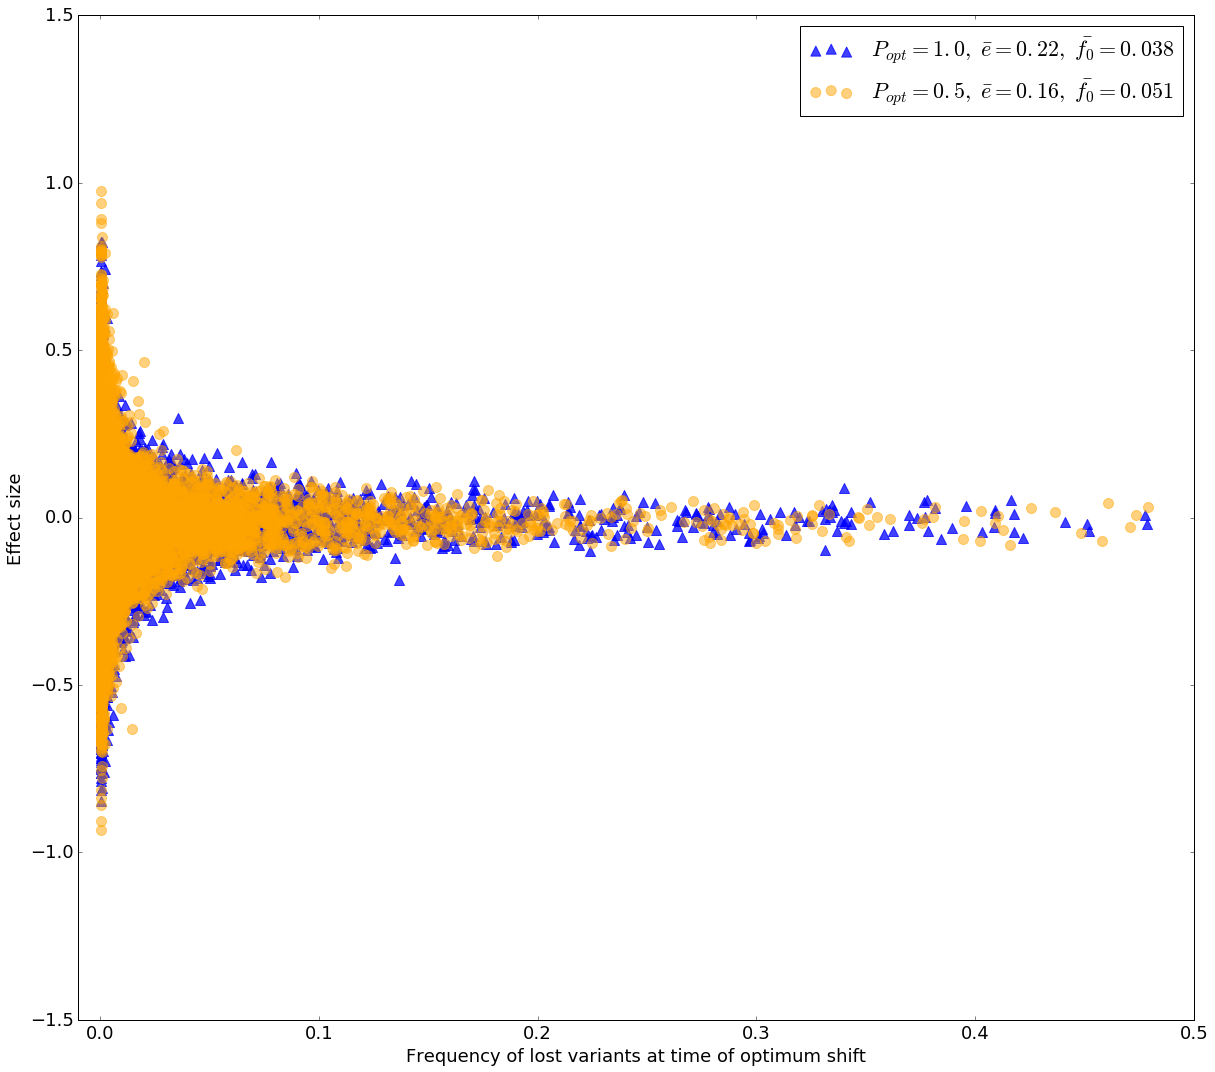

In [24]:
fig=matplotlib.pyplot.gcf()
fig.set_size_inches(20, 18)
plt.scatter(losses2.freq,losses2.esize,color='blue',alpha=0.75,label=r'$P_{opt} = 1.0,\ \bar{e}=0.22,\ \bar{f_0}=0.038$',s=100,marker="^")
plt.scatter(losses1.freq,losses1.esize,color='orange',alpha=0.5,label=r'$P_{opt} = 0.5,\ \bar{e}=0.16,\ \bar{f_0}=0.051$',s=100)

plt.xlim(-0.01,0.5)
plt.xlabel("Frequency of lost variants at time of optimum shift")
plt.ylabel("Effect size")
plt.legend(fontsize=22)
plt.savefig("LossesAtOptimumShift.pdf")

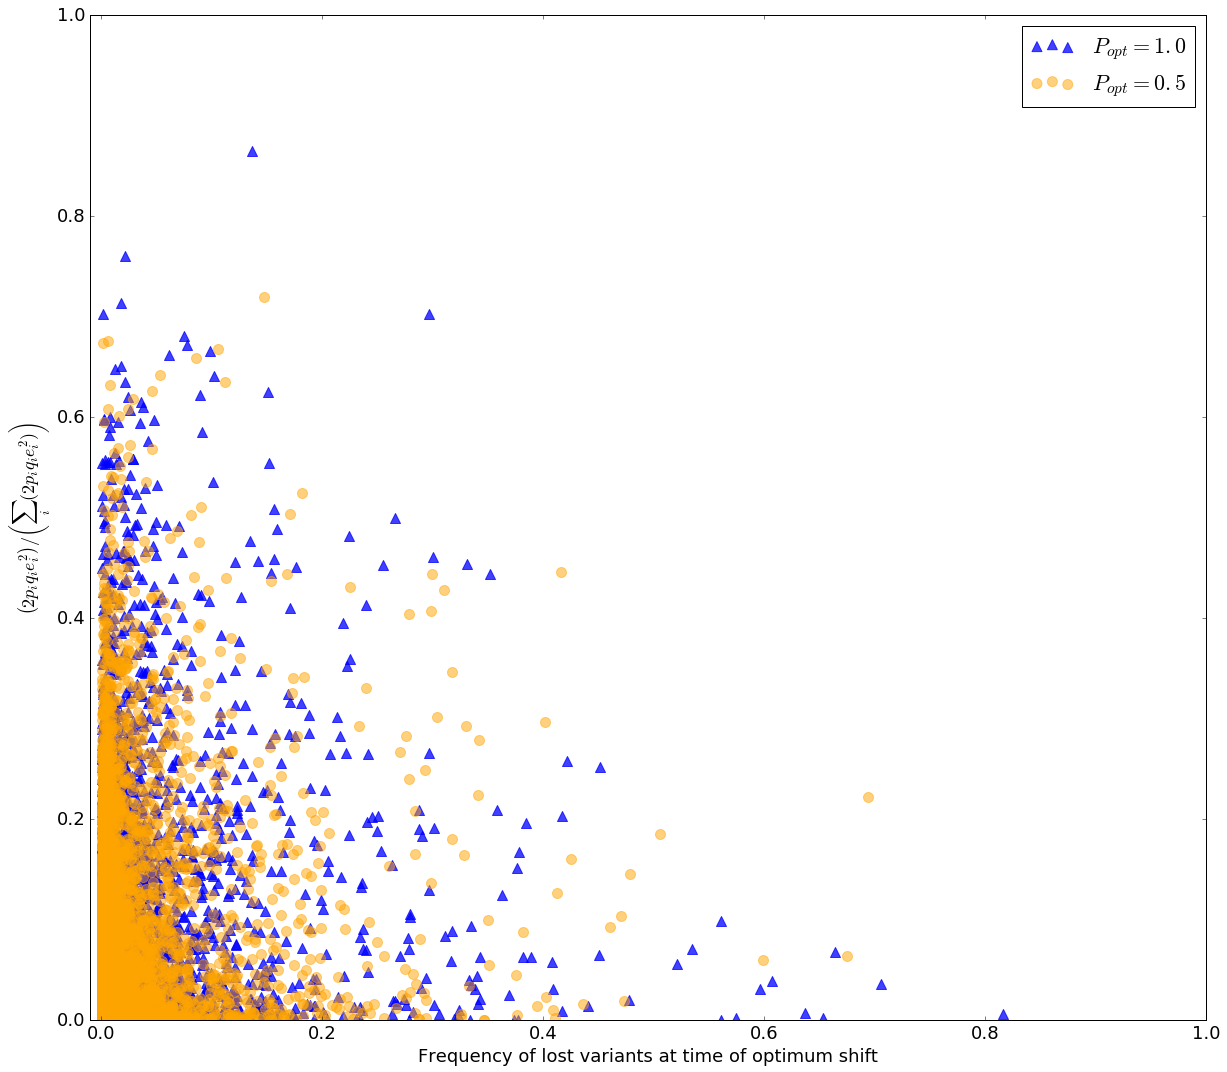

In [25]:
fig=matplotlib.pyplot.gcf()
fig.set_size_inches(20, 18)
plt.scatter(losses2.freq,losses2.pVG,color='blue',alpha=0.75,label=r'$P_{opt} = 1.0$',s=100,marker="^")
plt.scatter(losses1.freq,losses1.pVG,color='orange',alpha=0.5,label=r'$P_{opt} = 0.5$',s=100)

plt.xlim(-0.01,1)
plt.ylim(0,1)
plt.xlabel("Frequency of lost variants at time of optimum shift")
plt.ylabel(r'$\left(2p_iq_ie_i^2\right)/\left(\sum_i(2p_iq_ie_i^2)\right)$')
plt.legend(fontsize=22)
plt.savefig("LossesScaledEsizes.pdf")

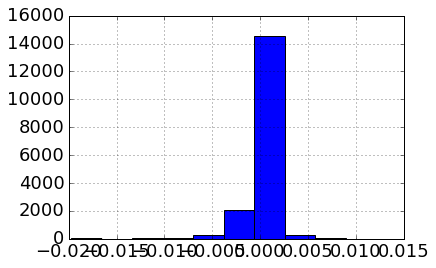

In [36]:
losses1.dq.hist(normed=False)

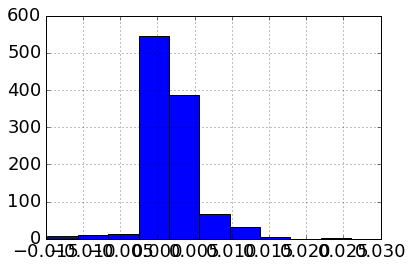

In [37]:
fixations1.dq.hist()

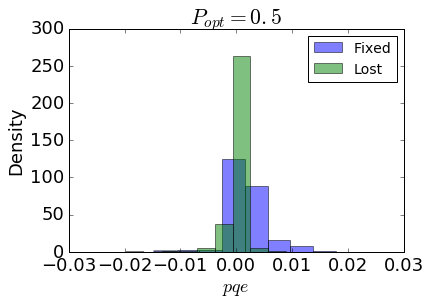

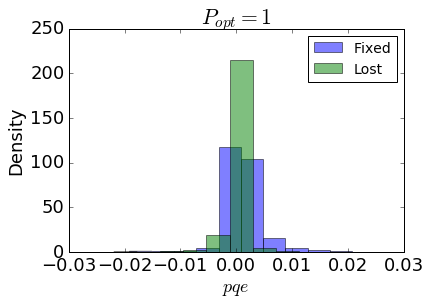

In [70]:
fig=plt.subplots()
plt.hist(fixations1.dq,normed=True,alpha=0.5,label='Fixed')
plt.hist(losses1.dq,normed=True,alpha=0.5,label='Lost')
plt.xlim(-0.03,0.03)
plt.xlabel(r'$pqe$')
plt.ylabel('Density')
plt.legend()
plt.title(r'$P_{opt} = 0.5$')
plt.savefig('pqeHist1.pdf')
fig,ax=plt.subplots()
plt.hist(fixations2.dq,normed=True,alpha=0.5,label='Fixed')
plt.hist(losses2.dq,normed=True,alpha=0.5,label='Lost')
plt.xlim(-0.03,0.03)
plt.xlabel(r'$pqe$')
plt.ylabel('Density')
plt.legend()
plt.title(r'$P_{opt} = 1$')
plt.savefig('pqeHist2.pdf')
#width = (f1_b[1] - f1_b[0])/4
#ax.bar(f1_b[:-1],f1_h,width=width,facecolor='blue')
#ax.bar(l1_b[:-1]+width,l1_h,width=width,facecolor='red')
#ax.bar(f2_b[:-1]+2.5*width,f2_h,width=width,facecolor='orange')

In [23]:
##Bin frequencies in intervals of 0.1,
##get mean pVG, plot for fixation and losses
frange=np.arange(0,1,0.1)
fixations1['bin']=pd.cut(fixations1.freq,frange)
losses1['bin']=pd.cut(losses1.freq,frange)
fixations2['bin']=pd.cut(fixations2.freq,frange)
losses2['bin']=pd.cut(losses2.freq,frange)

In [34]:
f1m=fixations1.groupby('bin').mean().reset_index()
f2m=fixations2.groupby('bin').mean().reset_index()
l1m=losses1.groupby('bin').mean().reset_index()
l2m=losses2.groupby('bin').mean().reset_index()
l1mplus=losses1[losses1.esize>0].groupby('bin').mean().reset_index()
l2mplus=losses2[losses2.esize>0].groupby('bin').mean().reset_index()

In [35]:
f1m.head()

,bin,esize,freq,generation,origin,pos,rep,age,VA,VGt,pVG
0,"(0, 0.1]",0.183342,0.016803,10000.0,9915.926087,0.501452,511.131522,85.073913,0.000670,0.004217,0.163788
1,"(0.1, 0.2]",0.040259,0.139386,10000.0,9535.200000,0.541014,548.142857,465.800000,0.000985,0.004977,0.189134
2,"(0.2, 0.3]",0.017872,0.255433,10000.0,9414.233333,0.408006,555.266667,586.766667,0.000579,0.004772,0.115692
3,"(0.3, 0.4]",0.001985,0.361762,10000.0,9357.523810,0.519862,552.047619,643.476190,0.000557,0.004781,0.127568
4,"(0.4, 0.5]",0.015325,0.447063,10000.0,9278.062500,0.474407,426.437500,722.937500,0.000894,0.004439,0.186072


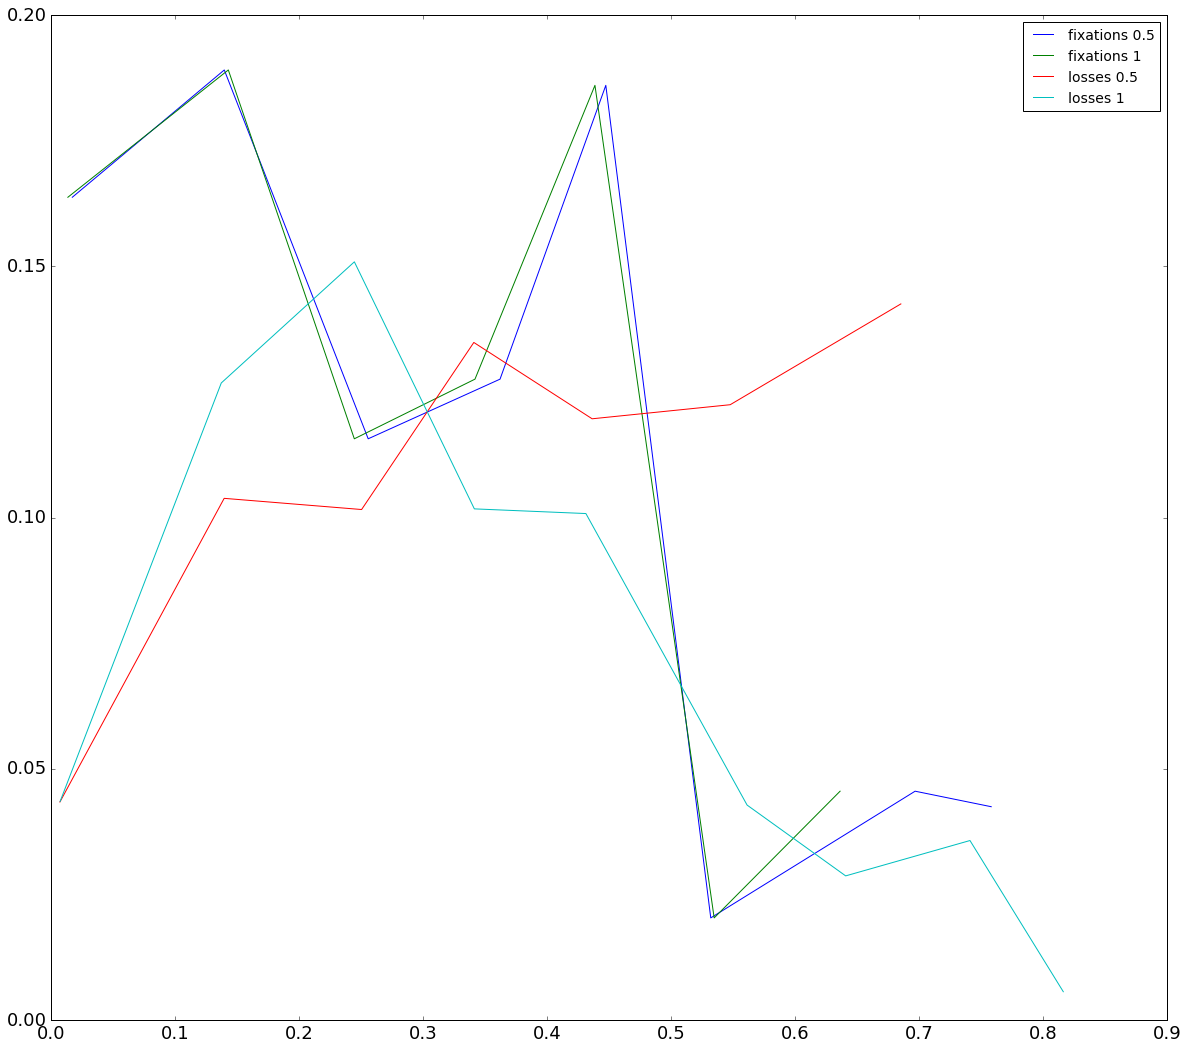

In [36]:
fig=matplotlib.pyplot.gcf()
fig.set_size_inches(20, 18)
plt.plot(f1m['freq'],f1m['pVG'],label='fixations 0.5')
plt.plot(f2m['freq'],f1m['pVG'],label='fixations 1')
plt.plot(l1m.freq,l1m.pVG,label='losses 0.5')
plt.plot(l2m.freq,l2m.pVG,label='losses 1')
plt.legend()